In [23]:
#ABHAY VINOD
#BL.EN.U4CSE21004
#ML_Lab4_Code

import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\user\\Downloads\\student_purchase_behaviour.csv")
data

,0,age,income,student,credit_rating,buys_computer
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31...40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes
5,6,>40,low,yes,excellent,no
6,7,31...40,low,yes,excellent,yes
7,8,<=30,medium,no,fair,no
8,9,<=30,low,yes,fair,yes
9,10,>40,medium,yes,fair,yes


In [34]:
#A1
import math
import pandas as pd

# Calculate the entropy of a given target attribute
def entropy(target_attr):
    counts = {}
    total = len(target_attr)

    for entry in target_attr:
        if entry not in counts:
            counts[entry] = 0
        counts[entry] += 1

    entropy = 0
    for key in counts:
        probability = counts[key] / total
        entropy -= probability * math.log2(probability)

    return entropy

# Calculate the information gain for a given dataset and attribute
def information_gain(data, attribute):
    total_entropy = entropy(data['buys_computer'])
    attribute_values = data[attribute].unique()

    for value in attribute_values:
        subset = data[data[attribute] == value]['buys_computer']
        subset_entropy = entropy(subset)
        total_entropy -= (len(subset) / len(data)) * subset_entropy

    return total_entropy

# Provided data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Define attribute names
attributes = ["age", "income", "student", "credit_rating"]

# Calculate information gain for each attribute
ig_values = {}
for attribute in attributes:
    ig = information_gain(df, attribute)
    ig_values[attribute] = ig

# Find the attribute with the highest information gain
root_node = max(ig_values, key=ig_values.get)

print("Information Gain for each attribute:")
for attribute, ig in ig_values.items():
    print(f"{attribute}: {ig}")

print(f"The root node for the decision tree is: {root_node}")



Information Gain for each attribute:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.048127030408269544
The root node for the decision tree is: age


In [41]:
#A2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Provided data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Extract features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode each feature column
label_encoders = [LabelEncoder() for _ in range(X.shape[1])]
for i in range(X.shape[1]):
    X[:, i] = label_encoders[i].fit_transform(X[:, i])

# Convert the data back to int (from string)
X = X.astype(int)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)
tree_depth = model.get_depth()

print("Depth of the constructed tree:", tree_depth)



Depth of the constructed tree: 4


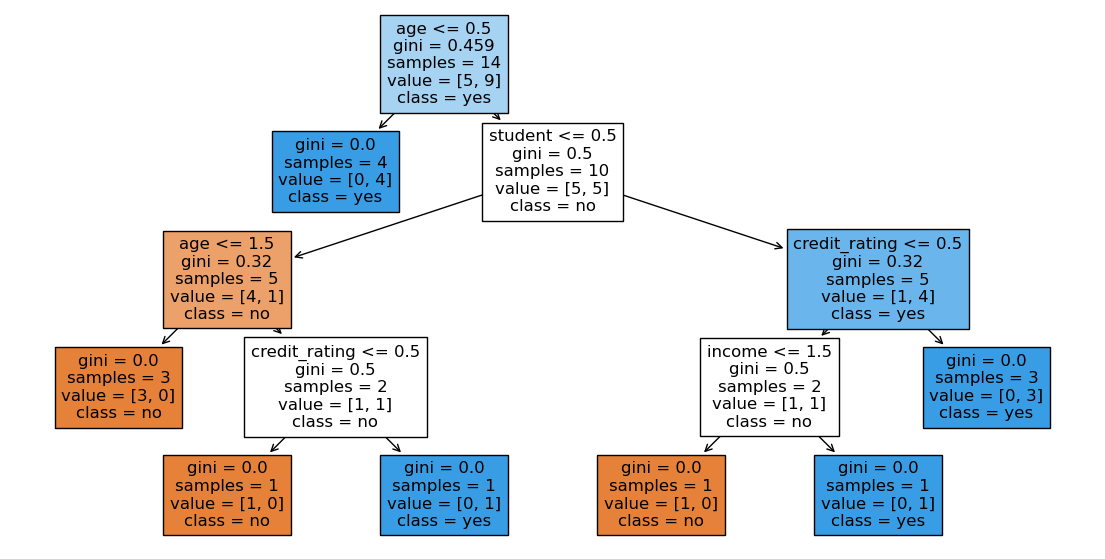

In [42]:
#A3

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
plt.figure(figsize=(14, 7))
plot_tree(model, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()

Training Set Accuracy: 1.0
Test Set Accuracy: 0.9867330016583747


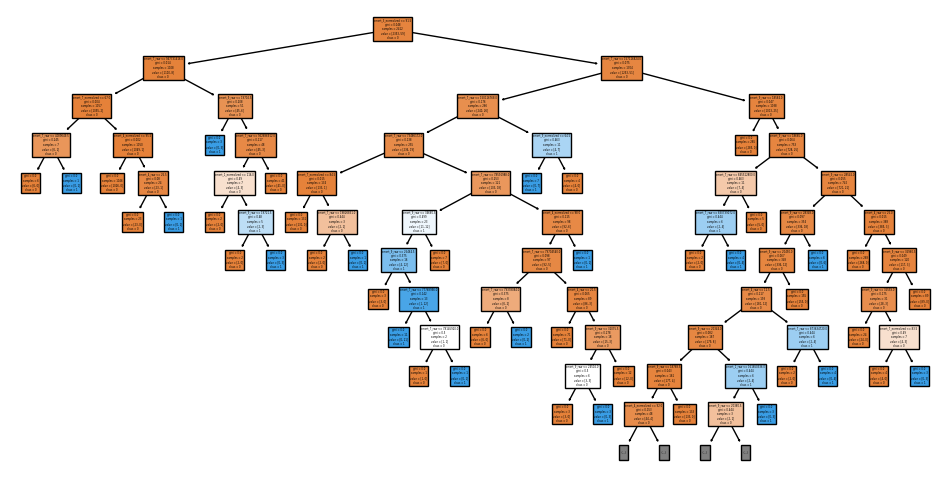

In [4]:
#A4
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data= pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\ML_dataset.csv")

# Assuming that 'failure' is the target variable and the rest are features
X = data.drop('failure', axis=1)
y = data['failure']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(Tr_X, Tr_y)

# Evaluate the accuracy on the training and test data
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

# Print the accuracy scores
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)
y = y.astype(str)
# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns.tolist(), class_names=y.unique().tolist(), filled=True,max_depth=10)
plt.show()

Training Set Accuracy (max_depth=5): 0.98
Test Set Accuracy (max_depth=5): 0.98


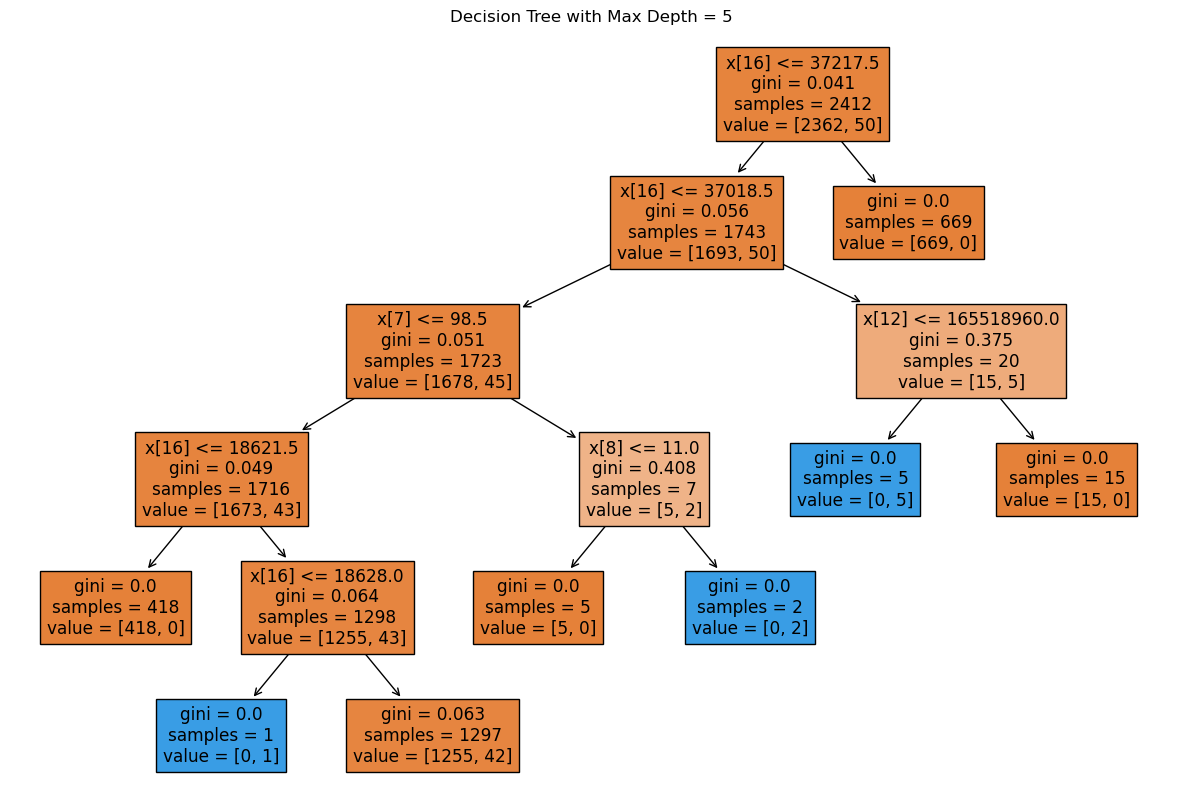

In [6]:
#A5
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data= pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\ML_dataset.csv")

# Separate features (X) and target (y)
X_features = data.drop('failure', axis=1)  # Replace 'diagnosed' with any target column name
y_target = data['failure']

# # Encode the 'id' column using LabelEncoder
# label_encoder = LabelEncoder()
# data['id'] = label_encoder.fit_ttransform(data['id'])

# Create a DecisionTreeClassifier with max_depth constraint
max_tree_depth = 5
decision_tree_model = DecisionTreeClassifier(max_depth=max_tree_depth)

# Split the data into features (X) and target (y), further into training and testing sets
X_features = data.drop('failure', axis=1) 
y_target = data['failure']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Fit the decision tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracy results
print(f"Training Set Accuracy (max_depth={max_tree_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_tree_depth}): {test_accuracy:.2f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, filled=True)
plt.title(f"Decision Tree with Max Depth = {max_tree_depth}")
plt.show()

Decision Tree with Criterion: Entropy
Training Set Accuracy: 1.00
Test Set Accuracy: 0.98


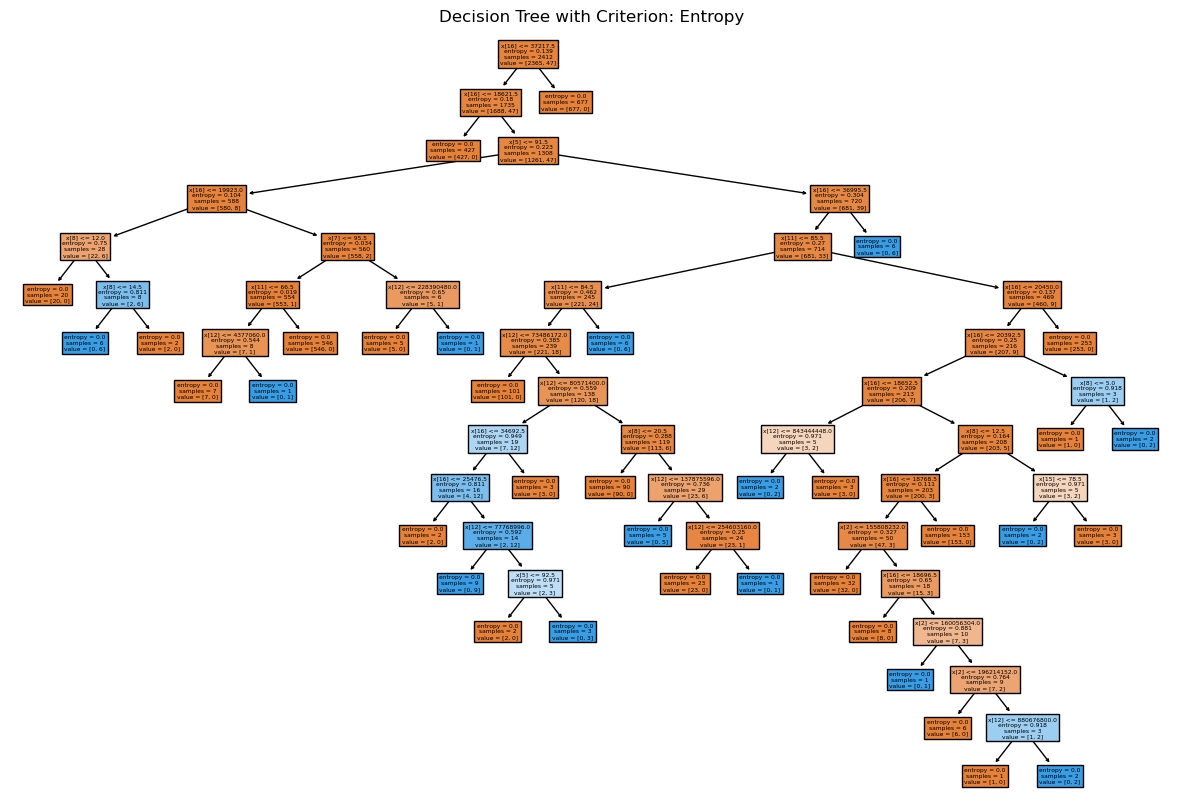

In [7]:
#A6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data= pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\ML_dataset.csv") 

# Create a DecisionTreeClassifier with criterion="entropy"
decision_tree_model = DecisionTreeClassifier(criterion="entropy")

# Split the data into features (X) and target (y), further into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Fit the decision tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print results
print("Decision Tree with Criterion: Entropy")
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Plot the Decision Tree with "Entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, filled=True)
plt.title("Decision Tree with Criterion: Entropy")
plt.show()

In [3]:
#A7
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data= pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\ML_dataset.csv") 

# Separate features (X) and target (y)
X_features = data.drop('failure', axis=1)  # Replace 'diagnosed' with your target column name
y_target = data['failure']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on test data using Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Predict on test data using Random Forest
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)

# Print performance metrics for both models
print("Decision Tree Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")

NameError: name 'X' is not defined

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data= pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\ML_dataset.csv") 

# Handle missing values using SimpleImputer
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split the data into features (X) and target (y)
X = data.drop('failure', axis=1)
y = data['failure']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
    
# Train the Random Forest model on the training data
rf_model.fit(Tr_X, Tr_y)

# Make predictions on the test data
rf_predictions = rf_model.predict(Te_X)

# Evaluate the Random Forest model
accuracy = accuracy_score(Te_y, rf_predictions)
conf_matrix = confusion_matrix(Te_y, rf_predictions)
class_report = classification_report(Te_y, rf_predictions)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


E:\Anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['smart_2_normalized' 'smart_2_raw' 'smart_8_normalized' 'smart_8_raw']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (3015, 14), indices imply (3015, 18)